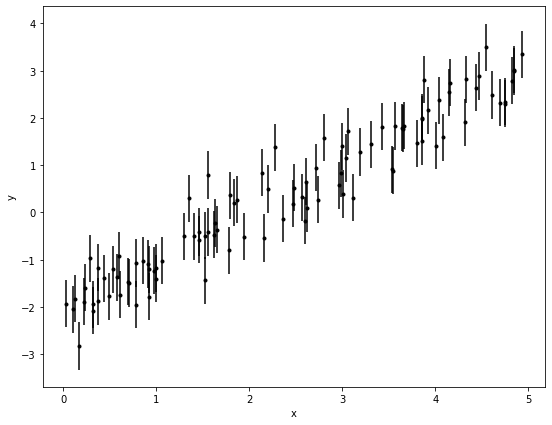

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

true_m = 1.0
true_b = -2
true_logs = np.log(0.5)

x = np.sort(np.random.uniform(0, 5, 100))
y = true_b + true_m * x + np.exp(true_logs) * np.random.randn(len(x))


plt.figure(figsize = [9,7])
plt.errorbar(x, y, yerr=np.exp(true_logs), fmt=".k")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Let's make broad priors:

m ~ uniform (-5,5) <br>
b ~ uniform (-5,5) <br>
log($\sigma$) ~ uniform (-5,5) <br>
$y_n$ ~ normal(m$x_n$ + b, $\sigma$) <br>




In [13]:
import pymc3 as pm

with pm.Model() as model:

    # Define the priors on each parameter:
    m = pm.Uniform("m", lower=-5, upper=5)
    b = pm.Uniform("b", lower=-5, upper=5)
    logs = pm.Uniform("logs", lower=-5, upper=5)

    # Define the likelihood. A few comments:
    #  1. For mathematical operations like "exp", you can't use
    #     numpy. Instead, use the mathematical operations defined
    #     in "pm.math".
    #  2. To condition on data, you use the "observed" keyword
    #     argument to any distribution. In this case, we want to
    #     use the "Normal" distribution (look up the docs for
    #     this).
    pm.Normal("obs", mu=m * x + b, sd=pm.math.exp(logs), observed=y)

    # This is how you will sample the model. Take a look at the
    # docs to see that other parameters that are available.
    trace = pm.sample(draws=1000, tune=1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [logs, b, m]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.


/Users/Danielyahalomi/.local/lib/python3.6/site-packages/pymc3/plots/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/Users/Danielyahalomi/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


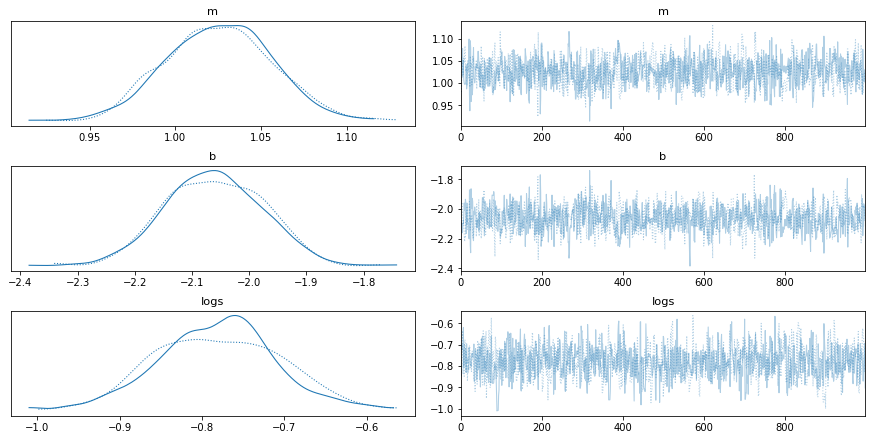

In [14]:
pm.traceplot(trace, varnames=["m", "b", "logs"]);


In [15]:
pm.summary(trace, varnames=["m", "b", "logs"])


/Users/Danielyahalomi/.local/lib/python3.6/site-packages/pymc3/stats/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)
/Users/Danielyahalomi/.local/lib/python3.6/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
m,1.026,0.030,0.969,1.079,0.001,0.001,1009.0,1008.0,1010.0,1106.0,1.00
b,-2.061,0.085,-2.207,-1.899,0.003,0.002,878.0,869.0,869.0,1085.0,1.00
logs,-0.781,0.074,-0.911,-0.634,0.002,0.002,990.0,957.0,985.0,704.0,1.01


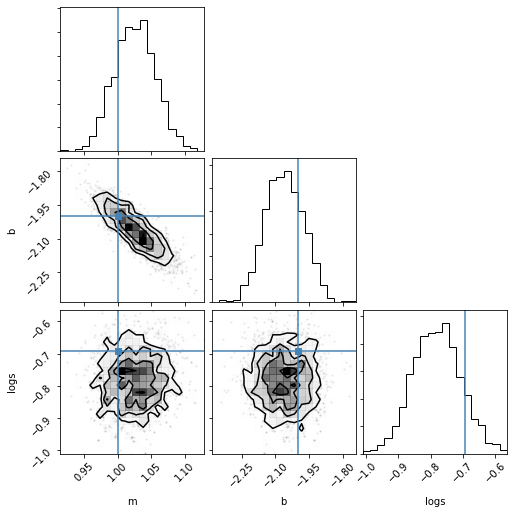

In [16]:
import corner  # https://corner.readthedocs.io

samples = pm.trace_to_dataframe(trace, varnames=["m", "b", "logs"])
corner.corner(samples, truths=[true_m, true_b, true_logs]);

In [ ]:
y_model = 